<a href="https://colab.research.google.com/github/zenosance/machine-learning/blob/main/midterm2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Clustering Challenge

## Intructions

1. Select 5 license plate images for each group member from the dataset provided.
2. Segment the number plate image to clarify the characters on the number plate.
3. You can use the K-Means algorithm as explained in the previous practicum or use another clustering algorithm.
4. You are allowed to carry out data preprocessing on the image such as,
    - Change the color space
    - Dimensional reduction
    - etc
5. Show image comparison between before and after segmentation

## Chall Bonus

1. How to evaluate segmentation results?
2. Apply to this case!


## Note:

The image loaded by OpenCV, so basically OpenCV load images in BGR format

<hr>

### 1. Library

In [ ]:

import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow


Mounted at /content/drive


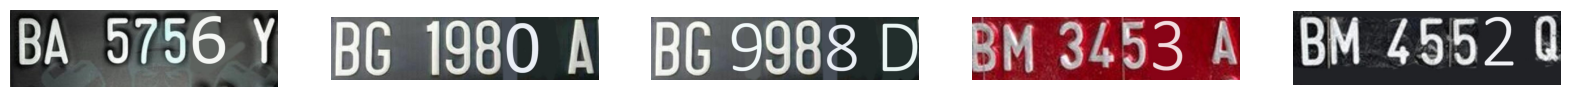

In [4]:
from google.colab import drive
drive.mount('/content/drive')


data = []

def plot_image(data):
    fig, ax = plt.subplots(1, 5, figsize=(20, 20))

    for i in range(len(data)):
        ax[i].imshow(data[i])
        ax[i].axis('off')

    plt.show()

for i in range(1, 6):
  img = cv.imread('/content/drive/MyDrive/machine-learning/img/' + str(i) + '.jpg', cv.IMREAD_COLOR)
  img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  data.append(img_rgb)

plot_image(data)

### 2. Melakukan Peningkatan Kualitas Gambar

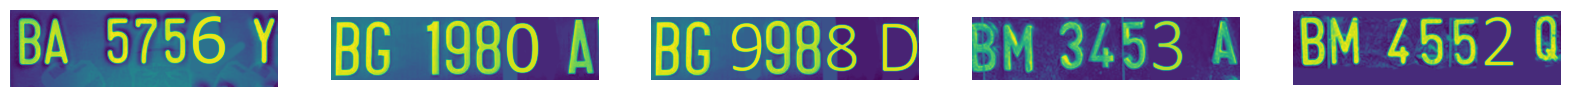

In [5]:
import cv2 as cv
import numpy as np

def increase_contrast_and_clarity(img):
    # Ubah gambar menjadi grayscale
    gray_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

    # Terapkan filter median untuk mengurangi noise
    denoised_img = cv.GaussianBlur(gray_img, (5, 5), 0)

    return denoised_img

data_increased = []

for img_rgb in data:
    # Peningkatan kontras dan kejelasan
    increased_img = increase_contrast_and_clarity(img_rgb)
    data_increased.append(increased_img)


plot_image(data_increased)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


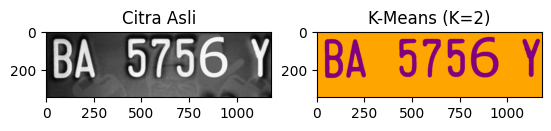

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


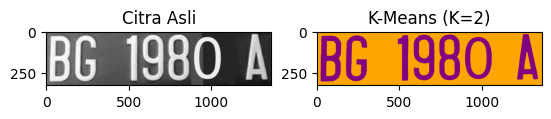

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


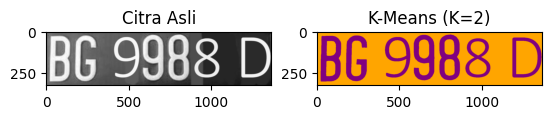

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


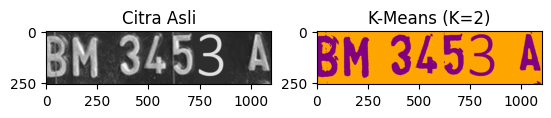

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


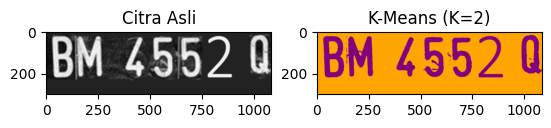

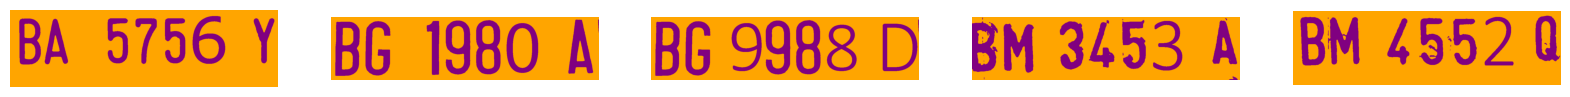

In [6]:
import cv2 as cv
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as compare_ssim


def kmeans_segmentation(image, num_clusters):
    reshaped_image = image.reshape(-1, 1)
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(reshaped_image)
    labels = kmeans.labels_.reshape(image.shape[:2])

    # Assign two distinct colors (orange and purple)
    unique_labels = np.unique(labels)
    color1 = [255, 165, 0]  # Orange
    color2 = [128, 0, 128]  # Purple

    colored_image = np.zeros(image.shape + (3,), dtype=np.uint8)

    for label in unique_labels:
        mask = (labels == label)
        if label == unique_labels[0]:
            colored_image[mask] = color1
        else:
            colored_image[mask] = color2

    return colored_image


num_clusters = 2
kmeans_tmp = []


for img in data_increased:
    segmented_img = kmeans_segmentation(img, num_clusters)
    kmeans_tmp.append(kmeans_segmentation(img, num_clusters))

    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Convert to RGB for consistency


    plt.subplot(1, 2, 1)
    plt.title('Citra Asli')
    plt.imshow(img)

    plt.subplot(1, 2, 2)
    plt.title(f'K-Means (K={num_clusters})')
    plt.imshow(segmented_img)

    plt.show()

plot_image(kmeans_tmp)

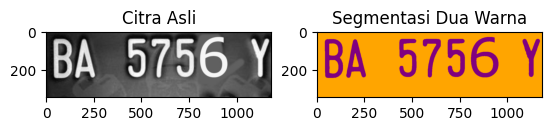

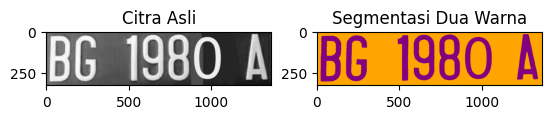

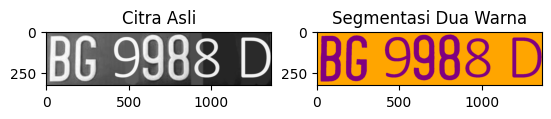

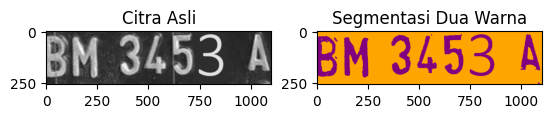

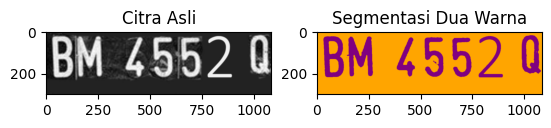

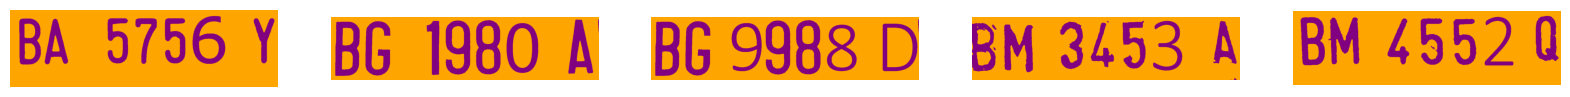

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def two_color_segmentation(image, threshold_value):
    # Lakukan operasi thresholding untuk menghasilkan citra biner
    _, segmented_img = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

    # Buat dua warna: oranye dan ungu
    orange = [255, 165, 0]  # Orange
    purple = np.array([128, 0, 128], dtype=np.uint8)

    # Inisialisasi citra hasil segmentasi dengan warna latar belakang ungu
    colored_image = cv2.cvtColor(segmented_img, cv2.COLOR_GRAY2BGR)
    colored_image[segmented_img == 255] = purple  # Set objek menjadi oranye
    colored_image[segmented_img == 0] = orange  # Set latar belakang menjadi ungu

    return colored_image

two_tmp = []

for img in data_increased:
    threshold_value = 148  # Ambil nilai ambang sesuai kebutuhan
    segmented_img = two_color_segmentation(img, threshold_value)
    two_tmp.append(two_color_segmentation(img, threshold_value))

    # Tampilkan citra asli
    plt.subplot(1, 2, 1)
    plt.title('Citra Asli')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    # Tampilkan hasil segmentasi dua warna (oranye dan ungu)
    plt.subplot(1, 2, 2)
    plt.title('Segmentasi Dua Warna')
    plt.imshow(segmented_img)

    plt.show()

plot_image(two_tmp)

In [16]:
from skimage.metrics import structural_similarity as compare_ssim

# Inisialisasi list untuk hasil SSIM
ssim_values = []

for i in range(len(kmeans_tmp)):
    # Konversi gambar ke citra grayscale
    gray_kmeans = cv2.cvtColor(kmeans_tmp[i], cv2.COLOR_BGR2GRAY)
    gray_two = cv2.cvtColor(two_tmp[i], cv2.COLOR_BGR2GRAY)

    # Hitung SSIM antara kedua citra grayscale
    ssim = compare_ssim(gray_kmeans, gray_two)
    ssim_values.append(ssim)

# Cetak hasil SSIM
for i, ssim in enumerate(ssim_values):
    print(f"SSIM antara K-Means dan Two-Color gambar ke-{i + 1}: {ssim}")


SSIM antara K-Means dan Two-Color gambar ke-1: 1.0
SSIM antara K-Means dan Two-Color gambar ke-2: 1.0
SSIM antara K-Means dan Two-Color gambar ke-3: 0.9914050182628132
SSIM antara K-Means dan Two-Color gambar ke-4: 0.8650886150816912
SSIM antara K-Means dan Two-Color gambar ke-5: 0.938654068661353
